# Imports

In [317]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading Data

In [318]:
# Here we are going to read the data from the csv file using encoding = 'iso-8859-1'
df = pd.read_csv('SalaryPrediction.csv', encoding= 'iso-8859-1')

# 1) Data pre-processing

## Show the head of the data frame

In [319]:
df.sample(3)

,ID,Wage,Age,Club,League,Nation,Position,Apps,Caps
2241,2242,248000,23,Union Berlin,Bundesliga,POR,Defender,106,0
1371,1372,897000,28,RC Lens,Ligue 1 Uber Eats,FRA,Goalkeeper,177,0
2882,2883,78000,20,Brentford,Premier League,ENG,Defender,0,0


- The dataset is comprised of 8 columns providing key details:
    - **Wage:** Annual salary of players.
    - **Age:** Current age of players.
    - **Club:** Current club affiliation of players.
    - **League:** The league in which the player's club competes (covering 6 leagues).
    - **Nation:** Nationality of the player.
    - **Position:** Player positions are categorized into Goalkeeper (GK), Defender (DF), Midfielder (MD), and Striker (ST).
    - **Apps:** Total club appearances made by players.
    - **Caps:** International appearances made by players.

## Get the information

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        3907 non-null   int64 
 1   Wage      3907 non-null   int64 
 2   Age       3907 non-null   int64 
 3   Club      3907 non-null   object
 4   League    3907 non-null   object
 5   Nation    3907 non-null   object
 6   Position  3907 non-null   object
 7   Apps      3907 non-null   int64 
 8   Caps      3907 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 274.8+ KB


All the data types right

## Show the description

In [321]:
# This column is the target, because it is what we want to predict
df.describe()

,ID,Wage,Age,Apps,Caps
count,3907.000000,3.907000e+03,3907.000000,3907.000000,3907.000000
mean,1954.000000,1.367959e+06,24.120553,140.057077,8.926542
std,1127.998079,2.589857e+06,4.935638,131.694425,20.518234
min,1.000000,1.400000e+03,18.000000,0.000000,0.000000
25%,977.500000,7.550000e+04,20.000000,15.000000,0.000000
50%,1954.000000,3.990000e+05,24.000000,115.000000,0.000000
75%,2930.500000,1.560000e+06,28.000000,224.500000,6.000000
max,3907.000000,4.642700e+07,41.000000,715.000000,180.000000


### We can see here that it seems that we have outliers for the "Wage" column, hence there is a big deffirent between the min and max wages

## Check if there is a null values

In [322]:
# We can check if there is any null values in the dataset or not, if the output = False --> no null values.
df.isnull().values.any()

False

False: means there is no null values.

## Create a mask

In [323]:
# Creating a DataFrame to not change the original DataFrame
df_norm = df.copy()

## Delete the unnecessary columns

In [324]:
# We are going to drop the ID column because it is not important for our analysis
df_norm.drop(['ID'], axis=1, inplace=True)

## Dropping the "Primiera Liga" League:

The decision has been made to exclude the "Primiera Liga" league from the dataset. This choice is based on its significant divergence from the other leagues on mean wage, contributing to a more cohesive and representative analysis.

In [325]:
display(df.groupby('League', as_index=False)['Wage'].mean().sort_values('Wage', ascending=False))

,League,Wage
3,Premier League,2.335982e+06
1,La Liga,1.520235e+06
0,Bundesliga,1.405219e+06
5,Serie A,1.336126e+06
2,Ligue 1 Uber Eats,1.237427e+06
4,Primiera Liga,1.948266e+05


In [326]:
df_norm.drop(df_norm[df_norm['League'] == 'Primiera Liga'].index, inplace=True)

In [327]:
# Show the first 5 rows of the new DataFrame 'after dropping the ID column'
df_norm.head()

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,46427000,23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,42125000,30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,34821000,35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,19959000,31,R. Madrid,La Liga,BEL,Forward,443,120
4,19500000,31,Man UFC,Premier League,ESP,Goalkeeper,480,45


# 2) Data Exploration (EDA)

### Types of Data
We deal with two main types of data: 

1. **Quantitative:** Involves numerical values and mathematical operations.
2. **Qualitative:** Encompasses categorical and object-oriented data.

### Types of Exploration
There are three primary types of exploration in data analysis:

1. **Univariate Analysis:** Examining each column independently.
2. **Bivariate Analysis:** Investigating the relationship between two columns.
3. **Multivariate Analysis:** Analyzing interactions involving more than two columns.

## Univariate Analysis

### Quantitative Data Analysis

In the analysis of Quantitative Data, each column (specifically "Wage" and "Age") will be individually examined. The following steps outline the process of quantitative analysis:

#### 1. Histogram Plot:
   - **Purpose:** Understand the Data's Shape and Determine Measures.
   - **Action:**
      - Examine if the plot is right-skewed (mean > median, tail to the right) or left-skewed (median > mean, tail to the left).
      - In case of skewness, consider transforming the data to achieve a normal distribution.
      - Regardless of skewness, prioritize using the median over the mean for robust central tendency measures.
      - Identify any notable patterns or characteristics in the distribution.

#### 2. Boxplot:
   - **Purpose:** Reveal the Five-Number Summary and Identify Outliers.
   - **Action:**
      - Analyze the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum values.
      - Use the interquartile range (IQR) to identify outliers.
      - Understand the spread and variability of the data.
      - Consider any patterns or trends in the data distribution.
      - Evaluate if there are extreme values that may require special attention.

### Functions

- Histogram with xRange
- Histogram without xRange
- BoxPlot
- Bar chart
- Pie chart

#### Function: Histogram Plotter for Column Distribution with Mean and Median Lines

Generate a histogram with specified parameters for a given column.

- **Parameters:**
    - column_name (str): The name of the column to plot.
    - width (int): Width of the figure (default is 8).
    - height (int): Height of the figure (default is 6).
    - num_of_bars (int): Number of bars in the histogram (default is 20).
    - data_frame (pd.DataFrame): The DataFrame containing the data (default is None).


In [328]:
import matplotlib.pyplot as plt
import seaborn as sns

def histo_plot(column_name, width=8, height=6, num_of_bars=20, data_frame=None):
    """
    Generate a histogram with specified parameters for a given column.

    Parameters:
    - column_name (str): The name of the column to plot.
    - width (int): Width of the figure (default is 8).
    - height (int): Height of the figure (default is 6).
    - num_of_bars (int): Number of bars in the histogram (default is 20).
    - data_frame (pd.DataFrame): The DataFrame containing the data (default is None).

    Returns:
    None
    
    # Example:
    >>> histo_plot('Age', width=10, height=8, num_of_bars=30)
    """
    # Use the provided DataFrame or a default DataFrame (replace 'defaultDf' with your default DataFrame)
    data_frame = data_frame if data_frame is not None else df.copy()

    # Set the figure size
    plt.figure(figsize=(width, height))

    # Plot the histogram with seaborn
    sns.histplot(data=data_frame, x=column_name, kde=True, bins=num_of_bars)

    # Add title and axis labels
    plt.title(f'{column_name} Distribution')
    plt.xlabel(column_name)
    plt.ylabel('Players')

    # Add vertical lines for mean and median
    plt.axvline(data_frame[column_name].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(data_frame[column_name].median(), color='black', linestyle='--', label='Median')

    # Display legend
    plt.legend()

    # Show the plot
    plt.show()

### Function: (Bar & Pie) Plotter Based on Top Wages

Generate bar & pie charts for the top records of a specified column based on wage.

- **Parameters:**
    - column_name (str): The categorical column in the DataFrame to analyze.
    - top (int, optional): The number of top records to consider. Default is None (all records).
    - bar (bool, optional): If True, generate a bar chart. Default is True.
    - pie (bool, optional): If True, generate a pie chart. Default is True.
    - data_frame (pd.DataFrame): The DataFrame containing the data.

In [329]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# catagory 
def plots_top_by_wages(column_name, top=None, bar=True, pie=True, data_frame=None):
    """
    Generate bar&pie charts for the top records of a specified column based on wage.

    Parameters:
    - column_name (str): The categorical column in the DataFrame to analyze.
    - top (int, optional): The number of top records to consider. Default is None (all records).
    - bar (bool, optional): If True, generate a bar chart. Default is True.
    - pie (bool, optional): If True, generate a pie chart. Default is True.
    - data_frame (pd.DataFrame): The DataFrame containing the data.

    Returns:
    None

    This function identifies and extracts the specified number of top records ('top' parameter) from the provided DataFrame based on Wage. 
    Subsequently, it shows the top count for each category. 
    The function then employs a pie chart to vividly illustrate the distribution patterns, enhancing the interpretability of the data.

    Args:
    - column_name: The categorical column for analysis.
    - top: The number of top records to consider.
    - bar: If True, generate a bar chart.
    - pie: If True, generate a pie chart.

    Example:
    >>> plots_top_by_wages('Nation', bar=True, pie=False, data_frame=df_norm)
    """
    # Extract the top records based on the specified number or all records if top is None
    top_records = data_frame.copy().head(top)

    # Display descriptive statistics for the mean wage values of the top records
    print(f'Descriptive statistics of wage values for the top {top} records:', top_records[column_name].describe())

    # Generate and display the bar chart if specified
    if bar:
        fig1 = px.bar(data_frame=top_records[column_name].value_counts(), title=f'{column_name} Frequancy For Top {top} Players by Wage')
        fig1.show()

    # Generate and display the pie chart if specified
    if pie:
        # Create a Matplotlib pie chart with improved label format
        fig_pie, ax = plt.subplots(figsize=(8, 6))
        wedges, texts, autotexts = ax.pie(top_records[column_name].value_counts(), autopct='%1.1f%%', startangle=90, textprops=dict(color="w"))

        # Add category names as a list on the side of the pie chart
        plt.legend(top_records[column_name].value_counts().index, title=f'{column_name} Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

        ax.set_title(f'{column_name} Percentage For Top {top} Players by Wage')
        plt.show()

# Example usage:
# plots_top_by_wages('Nation', bar=True, pie=True, data_frame=df_norm)

#### Function: (Bar & Pie) plotter for Categorical Data

Generate bar and pie charts for categorical data.

- **Parameters:**
    - column_name (str): The name of the column containing categorical data.
    - top (int, None): The number of top categories to display (default is None, which displays all categories).
    - bar (bool): If True, generate and display the bar chart.
    - pie (bool): If True, generate and display the pie chart.
    - data_frame (pd.DataFrame): The DataFrame containing the data.

In [330]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

def plots_top_cat(column_name, top=None, bar=True, pie=True, data_frame=None):
    """
    Generate bar and pie charts for categorical data.

    Parameters:
    - column_name (str): The name of the column containing categorical data.
    - top (int, None): The number of top categories to display (default is None, which displays all categories).
    - bar (bool): If True, generate and display the bar chart.
    - pie (bool): If True, generate and display the pie chart.
    - data_frame (pd.DataFrame): The DataFrame containing the data.

    Returns:
    None
    
    Example:
    >>> plots_top_cat('Nation', bar=True, pie=True, data_frame=df_norm)
    """
    # Extract the top records based on the specified number or all unique values if top is None
    top_records = data_frame.copy()
    
    if top is None:
        top = top_records[column_name].nunique()

    # Generate and display the bar chart if specified
    if bar:
        fig_bar = px.bar(data_frame=top_records[column_name].value_counts().head(top), title=f'Top {top} {column_name} Frequency')
        fig_bar.show()

    # Extract data for the pie chart
    top_records_counts = top_records[column_name].value_counts().head(top)
    labels = top_records_counts.index
    values = top_records_counts.values

    # Create a Matplotlib pie chart with improved label format
    if pie:
        fig_pie, ax = plt.subplots(figsize=(8, 6))
        wedges, texts, autotexts = ax.pie(values, autopct='%1.1f%%', startangle=90, textprops=dict(color="w"))

        # Add category names as a list on the side of the pie chart
        plt.legend(labels, title=f'{column_name} Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

        ax.set_title(f'Top {top} {column_name} Frequency')
        plt.show()

### Analysis for the "Wage" column

In [331]:
# Describe the data for Wage column

# df_norm["Wage"].describe() or:
df_norm.Wage.describe()

count    3.160000e+03
mean     1.645279e+06
std      2.800537e+06
min      1.400000e+03
25%      1.340000e+05
50%      6.460000e+05
75%      2.080000e+06
max      4.642700e+07
Name: Wage, dtype: float64

Descriptive Statistics for Wage:

- **Mean:** 1.645279e+06
- **Median (50%):** 6.460000e+05

The inequality between the mean and median, coupled with the fact that the median is less than the mean, indicates a right-skewed distribution.

#### Show the Histogram for the "Wage" column

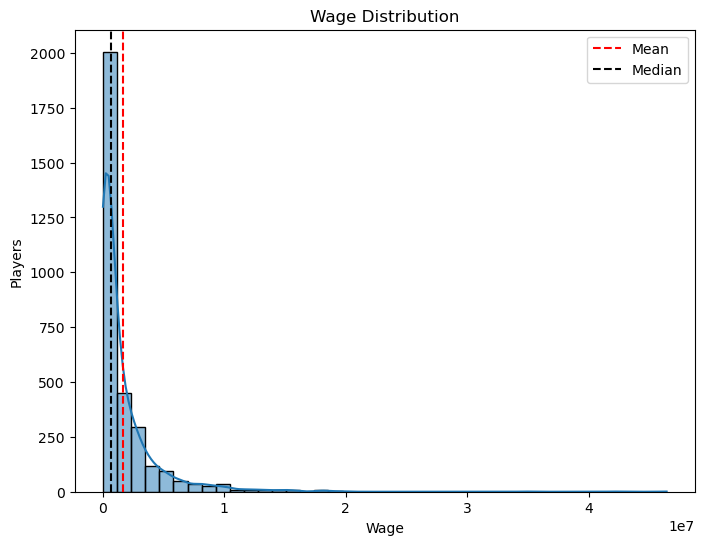

In [332]:
# Plot the distribution of Wage, using num_of_bars=40 to show more details
histo_plot('Wage', width=8, height=6, num_of_bars=40, data_frame=df_norm)

### Interpretation of Distribution Shape:

The observed distribution exhibits a right-skewed shape. Notably, the median (depicted by the black line) appears to be the closest central tendency measure to the distribution. Consequently, the median will be utilized for subsequent calculations due to its robustness in the presence of skewness.

In [333]:
# Calculate the mean, median, and quartiles of the Wage column
min = df_norm.Wage.min()
# first quartile, which is the 25th percentile. Note: Not necessarily the percentage for the first quartile to be 25%, it could be 24% or 20% or any other percentage
# But in the end, the sum of the percentages of the first and third quartiles should be 100%
q1 = df_norm.Wage.quantile(0.25)
# second quartile, which is the median
q2 = df_norm.Wage.median()
# third quartile, which is the 75th percentile, Note: Not necessarily the percentage for the third quartile to be 75%, it could be 76% or 80% or any other percentage
q3 = df_norm.Wage.quantile(0.75)

# Interquartile range (IQR), which is the difference between the third and first quartiles, to detect outliers
IQR = q3 - q1

# lower bound, to detect outliers
lb = q1 - (1.5*IQR) # Data less than the lower bound considerd as outliers

# upper bound, to detect outliers
ub = q3 + (1.5*IQR) # Data greater than the upper bound considerd as outliers

print(f'min = {min}, q1 = {q1}, q2 = {q2}, q3 = {q3}, IQR = {IQR}, lb = {lb}, ub = {ub}')

min = 1400, q1 = 134000.0, q2 = 646000.0, q3 = 2080000.0, IQR = 1946000.0, lb = -2785000.0, ub = 4999000.0


#### Show the Boxplot for the "Wage" column

<Axes: xlabel='Wage'>

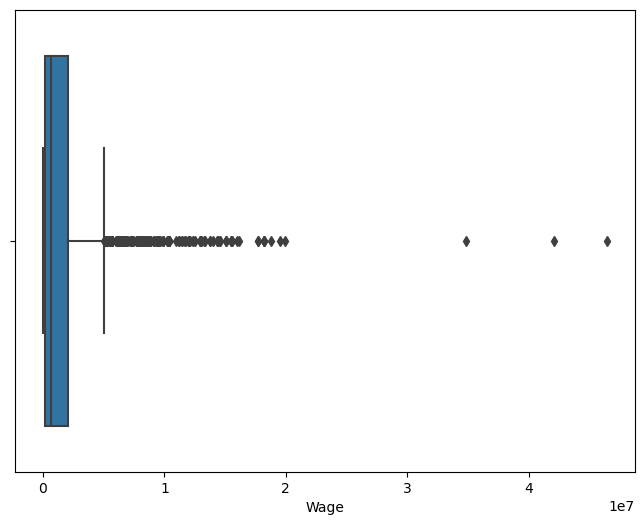

In [334]:
# Plot the boxplot for the Wage column, to detect outliers
plt.figure(figsize=(8,6))
sns.boxplot(data = df_norm, x='Wage')

# Note: The boxplot shows the outliers in the data
# 1e7 = 1 * 10^7 = 10000000

#### Another way to plot the Boxplot

In this plot, when you move the mouse to any point, there will be information about it

In [335]:
# Plot the boxplot for the Wage column, to detect outliers with using plotly to show more details
px.box(df_norm, x='Wage')








Identifying Suspicious Outliers:

The upper bound, depicted as the top line in the boxplot, designates any data point above it as a potential suspicious outlier, prompting closer examination.

#### Count how many outliers we have from the above Boxplot & upper bound info.

In [336]:
# Show how many players are suspected to be outliers, using the upper bound
df_norm[df_norm.Wage > ub].count()

Wage        260
Age         260
Club        260
League      260
Nation      260
Position    260
Apps        260
Caps        260
dtype: int64

### Handling Outliers:

260 players are flagged as outliers using the 75th percentile upper bound (3,786,750.0). 

To streamline the dataset and maintain coherence, any wages exceeding $34 million – the farthest point – will be removed.

#### Remove any player have a wage >= 34M

In [337]:
# Remove the outliers, any player with Wage greater than 34e6 will be removed
df_norm = df_norm[df_norm.Wage < 34e6]

# 34e6 = 34 * 10^6 = 34000000
# To check if the outliers are removed or not:
# df_norm[df_norm.Wage > 34e6].count()

### Analysis for the "Age" column

In [338]:
# Describe the data for Age column, using describe() function
# df_norm["Wage"].describe()
df_norm.Age.describe()

count    3157.000000
mean       24.365220
std         4.998729
min        18.000000
25%        20.000000
50%        24.000000
75%        28.000000
max        41.000000
Name: Age, dtype: float64

- **Mean:** 24.365220
- **Median (50%):** 24.000000

The near equality between the mean and median suggests a distribution that appears to be approximately normal.

#### Show the Histogram for the "Age" column

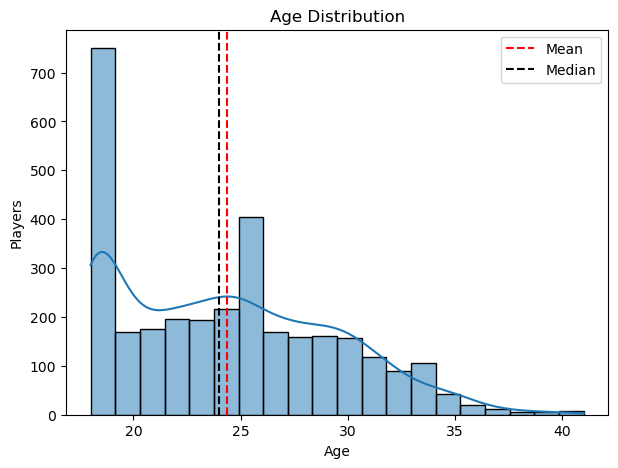

In [339]:
# Plot the distribution of Age
histo_plot('Age', width=7, height=5, num_of_bars=20, data_frame=df_norm)

Distribution Analysis for Age Column:

Observing the Age column, it is evident that the distribution is not normal; rather, it exhibits a right-skewed pattern with a tail extending to the right. 

To further assess the normality of the Age column, a Quantile-Quantile plot (Q-Q plot) will be employed. This diagnostic tool will provide insights into the conformity of the data to a normal distribution.

#### Q-Q Plot:

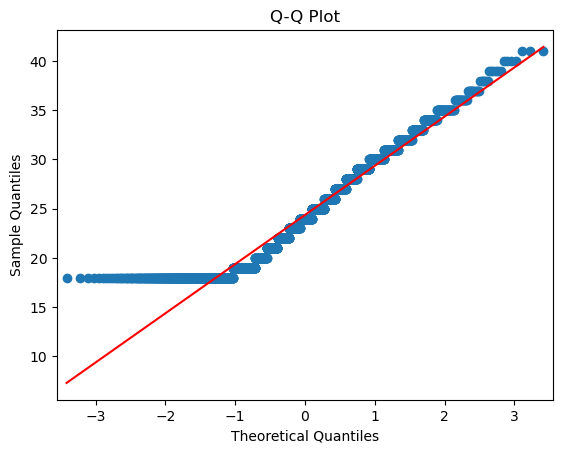

In [340]:
'''
The Q-Q plot compares the quantiles of your data with the quantiles of a theoretical
normal distribution. If the points fall approximately along a straight line, 
it suggests a normal distribution.
''' 
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset
sm.qqplot(df_norm.Age, line='s')
plt.title('Q-Q Plot')
plt.show()

Assessing Normality Using Q-Q Plot and Statistical Tests:

To evaluate the normality of the Age column, a Quantile-Quantile plot (Q-Q plot) is employed. This plot compares the quantiles of the data with those of a theoretical normal distribution. If the points align closely along a straight line, it indicates a normal distribution.

Furthermore, formal tests such as the Shapiro-Wilk test and the Anderson-Darling test can be utilized for a statistical assessment of normality. These tests provide quantitative measures to support the visual insights gained from the Q-Q plot.

#### Shapiro-Wilk test

In [341]:
from scipy.stats import shapiro

# Assuming 'data' is your dataset
stat, p_value = shapiro(df_norm.Age)

print(f'Statistic: {stat}, p-value: {p_value}')

# Interpret the p-value
if p_value > 0.05:
    print('The data looks approximately normally distributed.')
else:
    print('The data does not appear to be normally distributed.')


Statistic: 0.9417299032211304, p-value: 1.4154279925174786e-33
The data does not appear to be normally distributed.


Normality Statistical Test Results:

- **Statistic:** 0.9417299032211304
- **p-value:** 1.4154279925174786e-33

The statistical test results, with a low p-value, indicate that the data significantly deviates from a normal distribution. Consequently, based on both the Q-Q plot and statistical tests, it can be concluded that the ages column does not follow a normal distribution.

In [342]:
# Calculate the mean, median, and quartiles of the Wage column
min = df_norm.Age.min()
# first quartile, which is the 25th percentile. Note: Not necessarily the percentage for the first quartile to be 25%, it could be 24% or 20% or any other percentage
# But in the end, the sum of the percentages of the first and third quartiles should be 100%
q1 = df_norm.Age.quantile(0.25)
# second quartile, which is the median
q2 = df_norm.Age.median()
# third quartile, which is the 75th percentile, Note: Not necessarily the percentage for the third quartile to be 75%, it could be 76% or 80% or any other percentage
q3 = df_norm.Age.quantile(0.75)

# Interquartile range (IQR), which is the difference between the third and first quartiles, to detect outliers
IQR = q3 - q1

# lower bound, to detect outliers
lb = q1 - (1.5*IQR) # Data less than the lower bound considerd as outliers

# upper bound, to detect outliers
ub = q3 + (1.5*IQR) # Data greater than the upper bound considerd as outliers

print(f'min = {min}, q1 = {q1}, q2 = {q2}, q3 = {q3}, IQR = {IQR}, lb = {lb}, ub = {ub}')

min = 18, q1 = 20.0, q2 = 24.0, q3 = 28.0, IQR = 8.0, lb = 8.0, ub = 40.0


#### Show the Boxplot for the "Age" column

In [343]:
# Plot the boxplot for the Age column, to detect outliers
import plotly.express as px
px.box(df_norm, x='Age')

#### Count how many outliers we have from the above Boxplot & upper bound info.

In [344]:
# Show how many players are outliers by using the upper bound
df_norm[df_norm.Age > ub].count()

Wage        3
Age         3
Club        3
League      3
Nation      3
Position    3
Apps        3
Caps        3
dtype: int64

Handling Outliers in Age Column:

While there are four players with ages above the upper bound of 40, considering their ages are close at 41, it has been decided not to remove them as outliers. 

The proximity to the upper bound suggests these cases may not significantly distort the analysis, and their inclusion is retained.




### For Qualititave Data

In the analysis of Qualitative Data involving columns such as "Club," "League," "Nation," and "Position," the categorical nature of the data will be explored. The following steps outline the process of qualitative analysis:

#### 1. Bar Chart:
   - **Purpose:** Understand the Distribution and Characteristics of the Data.
   - **Action:**
      - Generate a bar chart for each qualitative column to visualize the frequency of categories.
      - Examine the shape of the data and identify prevalent categories.
      - Gain insights into the distribution patterns and frequencies.

#### 2. Pie Chart:
   - **Purpose:** Provide a Summary of the Distribution and Identify Outliers.
   - **Action:**
      - Generate a pie chart to represent the distribution of categories.
      - Utilize the chart to observe the five-number summary and identify potential outliers.
      - Understand the proportional representation of different categories.

### Analysis for the "Nation" column

In [345]:
# # Show general information about the column 
# display(df_norm.Nation.describe())

# display(df_norm.Nation.value_counts())

#### Show the Bar chart for  top 30 Nation Frequancy

In [346]:
plots_top_cat('Nation', top=30, bar=True, pie=False, data_frame=df_norm)

From the Bar Chart depicting the frequency of the top 30 nations, it's evident that Spain stands out as the most common nation with 452 players. 

This visual insight provides a straightforward understanding of player distribution among different nations.

### Analysis for the "Club" column

In [347]:
# # Show general information about the column 
# display(df_norm.Club.describe())

# display(df_norm.Club.value_counts())

#### Show the Bar chart for  top 30 Club Frequancy

In [348]:
plots_top_cat('Club', top=30, bar=True, pie=False, data_frame=df_norm)

From the Bar Chart depicting the frequency of the top 30 clubs, it's evident that MRT stands out as the most common club with 64 players. 

This visual insight provides a straightforward understanding of player distribution among different clubs.

### Analysis for the "League" column

In [349]:
# # Show general information about the column 
# display(df_norm.League.describe())

# display(df_norm.League.value_counts())

#### Show the Bar chart for leagues Frequancy

In [350]:
plots_top_cat('League', bar=True, pie=False, data_frame=df_norm)

From the Bar Chart depicting the frequency of each league, it's evident that Premier League stands out as the most common league with 875 players. 

This visual insight provides a straightforward understanding of player distribution among different leagues.

#### Show the Pie chart for top 500 player's Wage by league

Descriptive statistics of wage values for the top 500 records: count                500
unique                 5
top       Premier League
freq                 250
Name: League, dtype: object


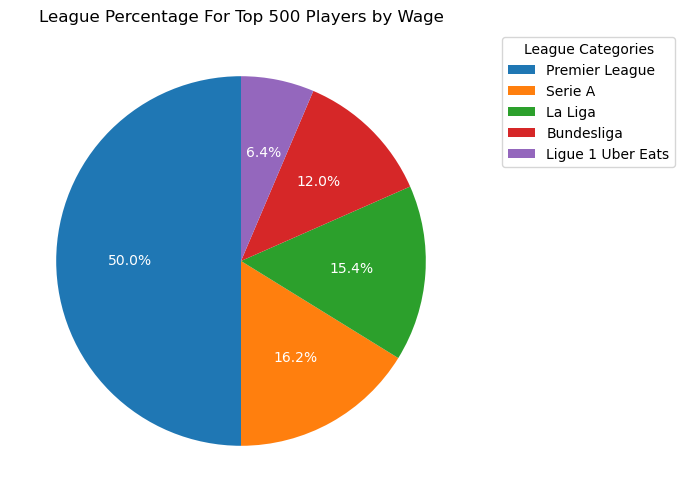

In [351]:
# Show the pie charts for leagues with top 500 players by wage
plots_top_by_wages('League', top=500, bar=False, pie=True, data_frame=df_norm)

In the analysis of the top 500 players by wage, it's notable that approximately 50% of them are part of the Premier League. 

This observation underscores the significant presence and influence of the Premier League within the top echelons of player salaries.

### Analysis for the "Position" column

In [352]:
# # Show general information about the column 
# display(df_norm.Position.describe())

# display(df_norm.Position.value_counts())

#### Show the Bar & Pie charts for positions Frequancy

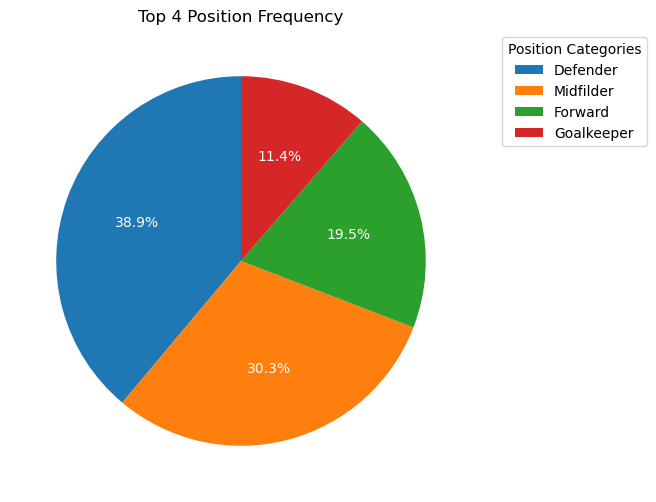

In [353]:
plots_top_cat('Position', bar=False, pie=True, data_frame=df_norm)

Within our dataset encompassing approximately 3157 players, it's evident that around 69% of them occupy the roles of defenders and midfielders.
 
This distribution aligns with expectations, reflecting the typical squad composition where the demand for these two positions tends to be higher compared to others.

## Bivariate Analysis

### Numeric with Numeric:
- **Scatter Plot:**
  Visualizes the relationship between two continuous variables.
- **Line Plot:**
  Useful for time-series data or when the relationship between two continuous variables needs to be visualized over a continuous interval.
- **Correlation Heatmap:**
  Displays the correlation coefficients between two continuous variables.
- **Hexbin Plot:**
  Suitable for visualizing the relationship between two continuous variables with high data density.

### Categorical with Numeric:
- **Box Plot:**
  Displays the distribution of a continuous variable across different levels of a categorical variable.
- **Violin Plot:**
  Combines aspects of box plots and kernel density plots for a categorical-numeric relationship.

### Categorical with Categorical:
- **Clustered Bar Chart:**
  Compares the distribution of categories in two categorical variables.
- **Heatmap:**
  Displays the frequency or other summary statistic of the combination of categories in two categorical variables.

### Functions

#### Function for plots sum based on wage

 Generate bar and pie charts based on the total wage distribution by a specified column.

- **Parameters:**
    - column_name (str): The categorical column in the DataFrame to analyze.
    - data_frame (pd.DataFrame, optional): The DataFrame containing the data. Default is None (use global df_norm).
    - top (int or None, optional): If specified and greater than 0, consider only the top N values in the specified column. Default is None.
    - bar (bool, optional): If True, generate a bar chart. Default is True.
    - pie (bool, optional): If True, generate a pie chart. Default is True.

In [354]:
import plotly.express as px

def plots_sum(column_name, top=None, bar=True, pie=True, data_frame=None):
    """
    Generate bar and pie charts based on the total wage distribution by a specified column.

    Parameters:
    - column_name (str): The categorical column in the DataFrame to analyze.
    - data_frame (pd.DataFrame, optional): The DataFrame containing the data. Default is None (use global df_norm).
    - top (int or None, optional): If specified and greater than 0, consider only the top N values in the specified column. Default is None.
    - bar (bool, optional): If True, generate a bar chart. Default is True.
    - pie (bool, optional): If True, generate a pie chart. Default is True.

    Returns:
    None

    This function calculates the total wage for each category in the specified column and
    generates both a bar chart and a pie chart to visualize the distribution.

    Args:
    - column_name: The categorical column for analysis.
    - data_frame: The DataFrame containing the data.
    - top: If specified and greater than 0, consider only the top N categories; if None, consider all categories.
    - bar: If True, generate a bar chart.
    - pie: If True, generate a pie chart.

    Example:
    >>> plots_sum('Nation', data_frame=df_norm, top=10, bar=True, pie=True)
    """

    # Use the provided DataFrame or a default DataFrame (replace 'df_norm' with your default DataFrame)
    data_frame = data_frame if data_frame is not None else df_norm.copy()

    # Calculate total wage and proportion for each category
    # proportion: the proportion of the total wage for each category / the total wage for all categories
    prop = data_frame.groupby(column_name, as_index=False)['Wage'].sum()
    prop['proportion'] = (prop.Wage / data_frame.Wage.sum()) * 100
    prop = prop.sort_values('proportion', ascending=False)
    
    top_label = ''
    # Filter the top N categories if specified
    if top is not None and top > 0:
        prop = prop.head(top)
        top_label = f' Top({top})'

    # Display summary statistics for the mean wage values
    print('Descriptive statistics of all mean wage values:', prop.Wage.describe())

    # Generate and display the bar chart if specified
    if bar:
        fig1 = px.bar(data_frame=prop, x=column_name, y='Wage', title=f'Total Wage By {column_name}{top_label}')
        fig1.show()

    # Generate and display the pie chart if specified
    if pie:
        fig2 = px.pie(data_frame=prop, names=column_name, values='Wage', title=f'Total Wage By {column_name}{top_label}')
        fig2.show()

#### Function for plots mean based on wage

Generate bar and pie charts based on the mean wage distribution by a specified column.

- **Parameters:**
    - column_name (str): The categorical column in the DataFrame to analyze.
    - data_frame (pd.DataFrame, optional): The DataFrame containing the data. Default is None (use global df_norm).
    - top (int or None, optional): If specified and greater than 0, consider only the top N values in the specified column. Default is None.
    - bar (bool, optional): If True, generate a bar chart. Default is True.
    - pie (bool, optional): If True, generate a pie chart. Default is True.


In [355]:
import plotly.express as px

def plots_mean(column_name, based_on='Wage', top=None, bar=True, pie=True, data_frame=None, asc=False):
    """
    Generate bar and pie charts based on the mean distribution by a specified column.

    Parameters:
    - column_name (str): The categorical column in the DataFrame to analyze.
    - based_on (str): The column in the DataFrame to calculate the mean values. Default is 'Wage'.
    - data_frame (pd.DataFrame, optional): The DataFrame containing the data. Default is None (use global df_norm).
    - top (int or None, optional): If specified and greater than 0, consider only the top N values in the specified column. Default is None.
    - bar (bool, optional): If True, generate a bar chart. Default is True.
    - pie (bool, optional): If True, generate a pie chart. Default is True.
    - asc (bool, optional): If True, sort values in ascending order; if False, sort in descending order. Default is False.

    Returns:
    None

    This function calculates the mean values for each category in the specified column and
    generates both a bar chart and a pie chart to visualize the distribution.

    Example:
    >>> plots_mean('Nation', based_on='Overall', data_frame=df_norm, top=10, bar=True, pie=True)
    >>> plots_mean('Nation', based_on='Overall', data_frame=df_norm, bar=True, pie=True)  # Consider all categories
    """

    # Use the provided DataFrame or a default DataFrame (replace 'df_norm' with your default DataFrame)
    data_frame = data_frame if data_frame is not None else df_norm.copy()

    # Calculate mean values and proportion for each category
    # proportion: the proportion of the mean values for each category / the mean values for all categories
    prop = data_frame.groupby(column_name, as_index=False)[based_on].mean()
    prop['proportion'] = (prop[based_on] / data_frame[based_on].mean()) * 100
    prop = prop.sort_values('proportion', ascending=asc)

    top_label = ''
    # Filter the top N categories if specified
    if top is not None and top > 0:
        prop = prop.head(top)
        top_label = f' Top({top})'

    # Display summary statistics for the mean values
    print(f'Descriptive statistics of all mean {based_on} values:', prop[based_on].describe())

    # Generate and display the bar chart if specified
    if bar:
        fig1 = px.bar(data_frame=prop, x=column_name, y=based_on, title=f'{top_label} Mean {based_on} By {column_name}')
        fig1.show()

    # Generate and display the pie chart if specified
    if pie:
        fig2 = px.pie(data_frame=prop, names=column_name, values=based_on, title=f'{top_label} Mean {based_on} By {column_name}')
        fig2.show()

### Leagues vs. Wage

To analyze the relationship between leagues and wages

#### Plot the Bar & Pie charts using the function 'plots_sum'

In [356]:
plots_sum('League', bar=True, pie=False, data_frame=df_norm)

Descriptive statistics of all mean wage values: count    5.000000e+00
mean     1.015142e+09
std      6.037360e+08
min      4.507930e+08
25%      7.827072e+08
50%      8.952048e+08
75%      9.030196e+08
max      2.043984e+09
Name: Wage, dtype: float64


From the presented plots, it's apparent that the sum of wages earned by players in the Premier League amounts to around 2 billion. 

This figure significantly surpasses its closest competitor, La Liga (Spain), by a margin of 1.1 billion. The dominance of the Premier League in total wages reflects its financial prowess within the dataset.

### Leagues vs. Age

To analyze the relationship between leagues and ages

In [357]:
plots_mean('League', based_on='Age', bar=True, pie=False, data_frame=df_norm)

Descriptive statistics of all mean Age values: count     5.000000
mean     24.526242
std       0.909470
min      23.189714
25%      24.317774
50%      24.383582
75%      25.239057
max      25.501085
Name: Age, dtype: float64


### Nations vs. Wage
To analyze the relationship between nations and wages

#### Plot the Bar chart using the function 'plots_sum'

In [358]:
plots_sum('Nation', bar=True, pie=False, data_frame=df_norm)

Descriptive statistics of all mean wage values: count    1.100000e+02
mean     4.614281e+07
std      1.121972e+08
min      2.850000e+04
25%      1.230750e+06
50%      8.492500e+06
75%      3.552975e+07
max      6.431372e+08
Name: Wage, dtype: float64


The analysis reveals that the top three nations by total wages are England, Spain, and Portugal, respectively. This observation aligns with expectations, considering that the Premier League, the top league by wages, is situated in England. 

### Nations vs. Ages
To analyze the relationship between nations and caps

In [359]:
plots_mean('Nation', based_on='Age', bar=True,top = 10, pie=False, data_frame=df_norm)

Descriptive statistics of all mean Age values: count    10.000000
mean     30.475000
std       1.600564
min      29.000000
25%      29.000000
50%      30.125000
75%      31.750000
max      33.500000
Name: Age, dtype: float64


### Position vs. Wage

To analyze the relationship between position and wages, I will use the (groupby) operation to calculate the mean of wages for each position.

In [360]:
display(df_norm.groupby('Position', as_index=False)['Wage'].mean().sort_values('Wage', ascending=False))

,Position,Wage
3,Midfilder,1.852718e+06
1,Forward,1.608875e+06
0,Defender,1.538651e+06
2,Goalkeeper,1.190648e+06


#### Plot the Bar chart using the function 'plots_mean'

In [361]:
plots_mean('Position', bar=True, pie=False, data_frame=df_norm)

Descriptive statistics of all mean Wage values: count    4.000000e+00
mean     1.547723e+06
std      2.734632e+05
min      1.190648e+06
25%      1.451650e+06
50%      1.573763e+06
75%      1.669836e+06
max      1.852718e+06
Name: Wage, dtype: float64


The analysis indicates that players in the midfielder position, on average, earn more than those in other positions. 

### Clubs vs. Wage

#### Plot Pie chart using the function 'plots_mean' for the top 5 clubs

In [362]:
plots_mean('Club', top=5, bar=False, pie=True, data_frame=df_norm)

Descriptive statistics of all mean Wage values: count    5.000000e+00
mean     6.902291e+06
std      1.944035e+06
min      4.622174e+06
25%      5.738853e+06
50%      6.313604e+06
75%      8.708043e+06
max      9.128783e+06
Name: Wage, dtype: float64


The analysis reveals that Real Madrid and FC Bayern exhibit close mean wages for each player on their respective teams. 

This proximity suggests a high caliber of players associated with these two clubs. The similarity in mean wages underscores the presence of top-quality players within Real Madrid and FC Bayern.

### AgeGroup vs. Wage Analysis:

To examine the relationship between age and wages, I will utilize the (groupby) operation to calculate the mean wages for each age group. This approach aims to provide insights into how player age correlates with their earning potential within the dataset.

In [363]:
# Create a new column for the age group, and group the players into 6 groups: 18-21, 22-25, 26-29, 30-33, 34-37, 38-41
df_norm2 = df_norm.copy()
df_norm2['AgeGroup'] = pd.cut(df_norm2.Age, bins=[18, 21, 25, 29, 33, 37, 41], labels=['18-21', '22-25', '26-29', '30-33', '34-37', '38-41'])

# Show general information about the column
display(df_norm2.AgeGroup.describe())

# display(df_norm2.groupby('AgeGroup', as_index=False)['Wage'].mean().sort_values('Wage', ascending=False))

count      2682
unique        6
top       22-25
freq        829
Name: AgeGroup, dtype: object

#### Plot the Bar chart using the function 'plots_mean'

In [364]:
plots_mean('AgeGroup', bar=True, pie=False, data_frame=df_norm2)

Descriptive statistics of all mean Wage values: count    6.000000e+00
mean     1.894403e+06
std      8.885685e+05
min      6.277171e+05
25%      1.246754e+06
50%      2.149628e+06
75%      2.624103e+06
max      2.711389e+06
Name: Wage, dtype: float64


In simpler terms, the plot indicates that players aged between 30 and 37 are closely grouped, followed by the age range of 26 to 29

### Age vs. Wage Exploration:

Instead of grouping, we'll use special plots to reveal how a player's age relates to their wage. 

This approach offers a more detailed look at the relation between age and wages in the dataset.

Since Age vs Wage is a numeric vs numeric variable, we can use scatter plot or Hexbin Plot  to show the relationship between them

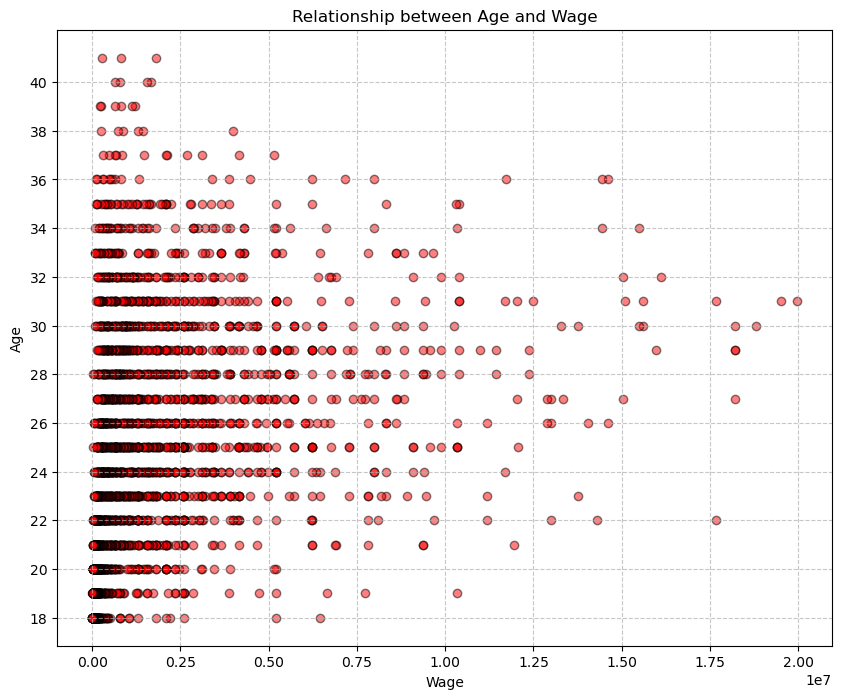

In [396]:
# plot size
plt.figure(figsize=(10,8))
# Scatter Plot for Age vs Wage
plt.scatter(df_norm2['Wage'], df_norm2['Age'], alpha=0.5, color='red', edgecolors='black')

# Title and Labels
plt.title('Relationship between Age and Wage')
plt.xlabel('Wage')
plt.ylabel('Age')

# Y-axis Ticks
plt.yticks(np.arange(18, 41, 2))

# Gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show Plot
plt.show()


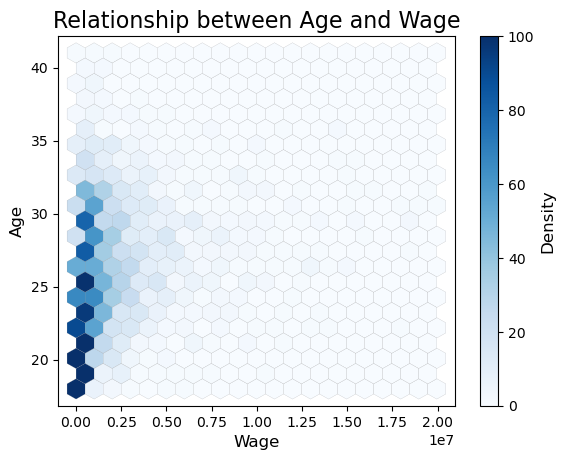

In [366]:

# Hexbin Plot for Age vs Wage with adjusted density range
plt.hexbin(df_norm2['Wage'], df_norm2['Age'], gridsize=20, cmap='Blues', edgecolors='grey', linewidth=0.1, vmin=0, vmax=100)

# Title and Labels
plt.title('Relationship between Age and Wage', fontsize=16)
plt.xlabel('Wage', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Colorbar for better interpretation
cbar = plt.colorbar()
cbar.set_label('Density', fontsize=12)


plt.show()

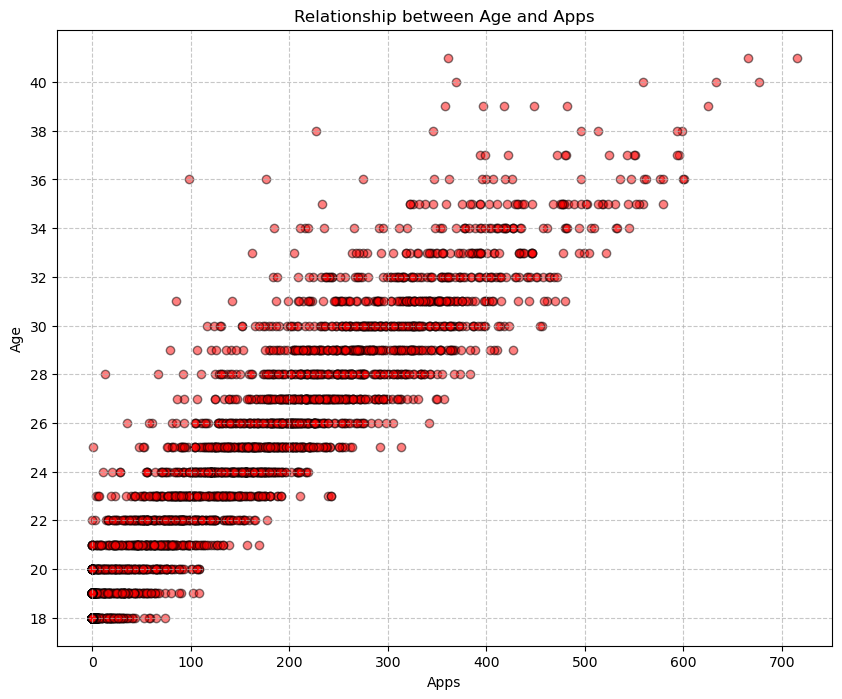

In [402]:
# draw a scatter plot for Apps vs Age
plt.figure(figsize=(10,8))
plt.scatter(df_norm2['Apps'], df_norm2['Age'], alpha=0.5, color='red', edgecolors='black')
plt.title('Relationship between Age and Apps')
plt.xlabel('Apps')
plt.ylabel('Age')
plt.yticks(np.arange(18, 41, 2))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Multivariate Analysis

### Visualizing Player Apps vs. Wages

Creates a scatter plot to illustrate the relationship between total club appearances (Apps), annual salary (Wage), and the age group of players. Each marker is color-coded by the player's age group, and the marker size is determined by the number of international appearances (Caps) made by the players.


In [369]:
# Create a scatter plot to visualize the relationship between international appearances (Caps), wages, and player age.
fig2 = px.scatter(
    df_norm2,
    x='Apps',        # x-axis: Total club appearances (Apps) 
    y='Wage',        # y-axis: Annual salary of players
    color='AgeGroup', # Color-coded by player age group
    size='Caps',      # Marker size based on International appearances made by players
    title='Player Apps vs. Wages'  # Plot title
)

# Show the scatter plot
fig2.show()


## Visualizing Player Caps vs. Wages

Create a scatter plot to depict the relationship between international appearances (Caps), annual salary (Wage), and player age. Each marker is color-coded based on the player's position, and the marker size is determined by the player's age.

In [370]:
# Create a scatter plot to visualize the relationship between international appearances (Caps), wages, and player age.
fig3 = px.scatter(
    df_norm2,
    x='Caps',        # x-axis: International appearances made by players
    y='Wage',        # y-axis: Annual salary of players
    color='Position', # Color-coded by player position
    size='Age',       # Marker size based on player age
    title='Player Caps vs. Wages'  # Plot title
)

# Show the scatter plot
fig3.show()


## Visualizing Player Distribution by Team and Position

Selects the top 10 players by wage for unique clubs and creates a sunburst plot. This visualization offers insights into the distribution of players across teams and their respective positions. The sunburst plot represents a hierarchy, with slices indicating teams and further divisions within each team representing different player positions.

In [403]:
# Select the top 10 players by wage for unique clubs
selectedClubs = df_norm2[df_norm2['Club'].isin(df_norm2['Club'].head(10).unique())]

# Create a sunburst plot to visualize player distribution by team and position
fig4 = px.sunburst(
    selectedClubs,
    path=['Club', 'Position'],  # Path to define hierarchy in the sunburst plot
    title='Player Distribution by Team by Position'  # Plot title
)

# Show the sunburst plot
fig4.show()


# Linear Regression

## Copy the data frame 2 (df_df_norm2) to a new data drame (df_norm3)

In [372]:
df_norm3 = df_norm2.copy()

## See the unique values for some columns, mainly to apply One-Hot Encoding

In [373]:
# For "Nation"
uniqueNation = df_norm3['Nation'].unique()
print(uniqueNation,"\n")
# count_unique_nation = df['Nation'].value_counts()
# print(count_unique_nation)

# For "Position"
uniquePosition = df_norm3['Position'].unique()
print(uniquePosition)

# For "Club"
# uniqueClub = df['Club'].unique()
# print(uniqueClub)

['BEL' 'ESP' 'AUT' 'EGY' 'ENG' 'FRA' 'NOR' 'GER' 'SVN' 'SEN' 'BRA' 'POL'
 'CRO' 'NED' 'POR' 'ITA' 'SRB' 'ALG' 'CIV' 'DEN' 'CRC' 'KOR' 'GHA' 'ARG'
 'URU' 'MAR' 'GAB' 'SWE' 'SCO' 'COL' 'TUR' 'BIH' 'UKR' 'USA' 'CMR' 'CAN'
 'GUI' 'WAL' 'MLI' 'SUI' 'CTA' 'DOM' 'NIR' 'MEX' 'NGA' 'VEN' 'CZE' 'SVK'
 'JAM' 'CHI' 'ARM' 'NZL' 'ZAM' 'JPN' 'RUS' 'PAR' 'ALB' 'IRL' 'MNE' 'KOS'
 'FIN' 'GRE' 'AUS' 'BFA' 'ECU' 'ISR' 'HUN' 'IRN' 'COD' 'TOG' 'ROU' 'UZB'
 'MKD' 'MOZ' 'GRN' 'GEO' 'ZIM' 'TUN' 'SUR' 'LUX' 'GAM' 'EQG' 'HON' 'MSR'
 'BUL' 'ANG' 'RSA' 'BDI' 'CYP' 'PER' 'SLE' 'GLP' 'BEN' 'PHI' 'GUF' 'CPV'
 'COM' 'GNB' 'CGO' 'ISL' 'MAD' 'LTU' 'LVA' 'EST' 'GUY' 'IRQ' 'THA' 'CHN'
 'BER' 'SIN'] 

['Forward' 'Goalkeeper' 'Defender' 'Midfilder']


## Apply to them one-hot encoding

In [374]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
le = LabelEncoder()

In [375]:
df_norm3['Nation'] = le.fit_transform(df_norm3['Nation'])

# Print the mapping for the 'League' column
league_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping for 'Nation' column:")
print(league_mapping)

Mapping for 'Nation' column:
{'ALB': 0, 'ALG': 1, 'ANG': 2, 'ARG': 3, 'ARM': 4, 'AUS': 5, 'AUT': 6, 'BDI': 7, 'BEL': 8, 'BEN': 9, 'BER': 10, 'BFA': 11, 'BIH': 12, 'BRA': 13, 'BUL': 14, 'CAN': 15, 'CGO': 16, 'CHI': 17, 'CHN': 18, 'CIV': 19, 'CMR': 20, 'COD': 21, 'COL': 22, 'COM': 23, 'CPV': 24, 'CRC': 25, 'CRO': 26, 'CTA': 27, 'CYP': 28, 'CZE': 29, 'DEN': 30, 'DOM': 31, 'ECU': 32, 'EGY': 33, 'ENG': 34, 'EQG': 35, 'ESP': 36, 'EST': 37, 'FIN': 38, 'FRA': 39, 'GAB': 40, 'GAM': 41, 'GEO': 42, 'GER': 43, 'GHA': 44, 'GLP': 45, 'GNB': 46, 'GRE': 47, 'GRN': 48, 'GUF': 49, 'GUI': 50, 'GUY': 51, 'HON': 52, 'HUN': 53, 'IRL': 54, 'IRN': 55, 'IRQ': 56, 'ISL': 57, 'ISR': 58, 'ITA': 59, 'JAM': 60, 'JPN': 61, 'KOR': 62, 'KOS': 63, 'LTU': 64, 'LUX': 65, 'LVA': 66, 'MAD': 67, 'MAR': 68, 'MEX': 69, 'MKD': 70, 'MLI': 71, 'MNE': 72, 'MOZ': 73, 'MSR': 74, 'NED': 75, 'NGA': 76, 'NIR': 77, 'NOR': 78, 'NZL': 79, 'PAR': 80, 'PER': 81, 'PHI': 82, 'POL': 83, 'POR': 84, 'ROU': 85, 'RSA': 86, 'RUS': 87, 'SCO': 88, '

In [376]:
df_norm3['League'] = le.fit_transform(df_norm3['League'])

# Print the mapping for the 'League' column
league_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping for 'League' column:")
print(league_mapping)

Mapping for 'League' column:
{'Bundesliga': 0, 'La Liga': 1, 'Ligue 1 Uber Eats': 2, 'Premier League': 3, 'Serie A': 4}


In [377]:
df_norm3['Club'] = le.fit_transform(df_norm3['Club'])

# Print the mapping for the 'League' column
league_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping for 'Club' column:")
print(league_mapping)

Mapping for 'Club' column:
{'1. FC Koln': 0, 'A. Bilbao': 1, 'A. Madrid': 2, 'AC Ajaccio': 3, 'AJ Auxerre': 4, 'AS Monaco': 5, 'Almeria': 6, 'Angers SCO': 7, 'Arsenal': 8, 'Aston Villa': 9, 'Atalanta': 10, 'Atletico Pamplona': 11, 'Barcelona': 12, 'Bayer 04': 13, 'Bologna': 14, 'Borussia Dortmund': 15, "Borussia M'gladbach": 16, 'Bournemouth': 17, 'Brentford': 18, 'Brest': 19, 'Brianza': 20, 'Brighton': 21, 'Cadiz': 22, 'Capitoline': 23, 'Chelsea': 24, 'Clermont': 25, 'Cremonese': 26, 'Crystal Palace': 27, 'Eintracht Frankfurt': 28, 'Elche': 29, 'Empoli': 30, 'Espanyol': 31, 'Everton': 32, 'FC Augsburg': 33, 'FC Bayern': 34, 'FC Lorient': 35, 'FC Nantes': 36, 'Fiorentina': 37, 'Fulham': 38, 'Getafe': 39, 'Girona': 40, 'Hertha Berlin': 41, 'Hoffenheim': 42, 'Inter': 43, 'Juventus': 44, 'LOSC': 45, 'Lazio': 46, 'Leeds': 47, 'Leicester': 48, 'Liverpool': 49, 'Mainz 05': 50, 'Mallorca': 51, 'Man City': 52, 'Man UFC': 53, 'Milan': 54, 'Montpellier': 55, 'Newcastle': 56, 'Nottm Forest': 57, 

In [378]:
df_norm3['Position'] = le.fit_transform(df_norm3['Position'])

# Print the mapping for the 'League' column
league_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping for 'Position' column:")
print(league_mapping)

Mapping for 'Position' column:
{'Defender': 0, 'Forward': 1, 'Goalkeeper': 2, 'Midfilder': 3}


In [379]:
# drop AgeGroup column from df_norm3, because we don't need it anymore
df_norm3.drop(['AgeGroup'], axis=1, inplace=True)

## Standardize numeric columns
### Standardizing numeric columns to ensure that all features have similar scales

In [380]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
# Use StandardScaler() for some features
# standardization is applied to the numeric columns 'daylight_hrs', 'Rainfall (in)', and 'Temp (F)'.

# This process helps ensure that these features have same scales,
# and that will make the linear regression model more effective and stable during training

cols = [
    'Wage',
    'Apps',
    'Caps',
    'Age'
]
scaler = StandardScaler()

# The loop
for col in cols:
    df_norm3[col] = scaler.fit_transform(df_norm3[[col]])

df_norm3.head()

,Wage,Age,Club,League,Nation,Position,Apps,Caps
3,7.286095,1.327504,63,1,8,1,2.157665,5.025986
4,7.103856,1.327504,53,3,36,2,2.431879,1.586997
5,6.829901,1.127421,63,1,6,0,1.624058,3.833803
6,6.587710,0.927338,43,4,8,1,2.039085,4.200629
7,6.587710,1.127421,49,3,33,1,1.594413,3.421125


## Find the correlation matrix so we can drop any columns that not much related

<Axes: >

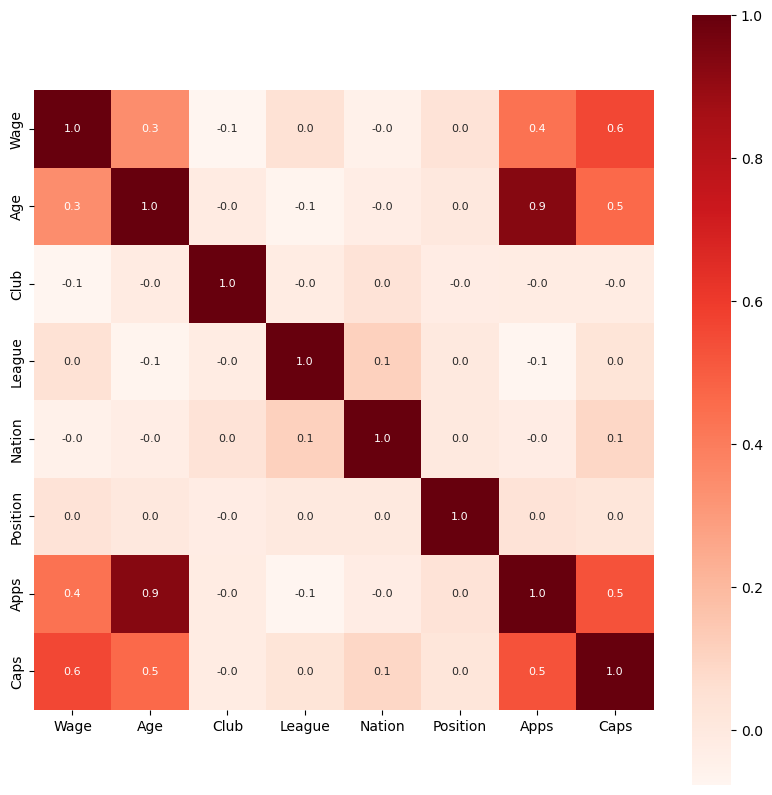

In [381]:
correlation = df_norm3.corr()
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

Observing the heatmap, we note that the correlation values between Wage and the variables Club, League, Nation, and Position all fall within the range of -0.1 to 0.0. 

This indicates a weak relationship between these factors.

## Drop redundant and/or irrelevant columns

In [382]:
# Removing columns that are not needed for our model/linear regression
df_norm3 = df_norm3.drop(['Nation', 'Position', 'Club', 'League'], axis=1)

## Split data into input features (data_x) and target variable (data_y)

In [383]:
# Separating the dataset into input features (data_x) and the target variable (data_y)
data_y = df_norm3['Wage'] # target
data_x = df_norm3.drop(['Wage'], axis=1) # input features

## Convert the input and target featurs to numpy arrays

In [384]:
X = data_x.values
y = data_y.values

## Split the data into training and validation sets

In [385]:
# Splitting the dataset to training and validation sets for our model evaluation
# Hence, I will choose the training size to be 80% and the validation/test size to be 20%

train_size = int(0.8 * len(data_x))
data_X_train, data_df_train = data_x.head(train_size), df_norm3.head(train_size)
data_x_validate, data_df_validate = data_x.tail(len(data_x) - train_size), df_norm3.tail(len(data_x) - train_size)

# Define input features and target variable for training set
# Concatenate a bias column to the input features for training set
X_train = np.concatenate([np.ones((data_X_train.shape[0], 1)), data_X_train.values], axis=1)
y_train = data_df_train['Wage'].values.reshape(-1, 1)

# Define input features and target variable for validation set
# Concatenate a bias column to the input features for validation set
X_test = np.concatenate([np.ones((data_x_validate.shape[0], 1)), data_x_validate.values], axis=1)
y_test = data_df_validate['Wage'].values.reshape(-1, 1)

## 1) calculatate theta, 2) Calculate the predictions over the training set and testing set

In [386]:
## calculatate theta
# theta = np.linalg.inv(x_train.T @ x_train) @ (x_train.T @ y_train)
# Calculate the optimal weights using the normal equation for linear regression
theta = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)

## calculate the predictions over the training set
y_train_pred = X_train @ theta

# calculate the predictions over the testing set
y_test_pred = X_test @ theta

## Defining the Mean Squared Error Function

In [387]:
# Define the mean squared error function for evaluation
def mean_squared_error(y, yhat):
    return 1/len(y) * np.sum(np.square(y - yhat))

## MSE Loss function

In [388]:
# Calculating the mean squared error for both trainingset and test set
MSE_train = mean_squared_error(y_train, y_train_pred)

MSE_test = mean_squared_error(y_test, y_test_pred)

## Print the calculated theta

In [389]:
print(f'Values calculated by Model: {theta.flatten()}')

Values calculated by Model: [ 0.09127538 -0.45375979  0.52028426  0.45198675]


## Print the calculated losses

In [390]:
print("Training Loss =", MSE_train)
print("Test Loss =", MSE_test)

Training Loss = 0.7762607840091325
Test Loss = 0.21654229595380994


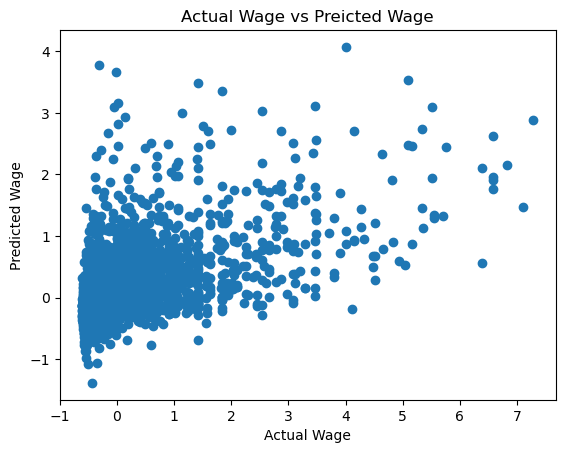

In [391]:
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Wage")
plt.ylabel("Predicted Wage")
plt.title("Actual Wage vs Preicted Wage")
plt.show()

The results from the model indicate that it's doing a good job predicting player wages. The training loss (0.776) shows that the model learned well from the training data, understanding the connections between player age, appearances (Apps), international appearances (Caps), and wages.

The test loss (0.217) suggests that the model can also make accurate predictions on new, unseen data. So, it seems like the model is performing well.

### Key Points:

**1. How Well the Model Works:**
   - **Training Loss (0.776):** The model learned a lot from the training data, grasping how age, appearances, and international appearances relate to player wages.
   - **Test Loss (0.217):** The model can make accurate predictions on new data, which is a positive sign.

**2. Important Features:**
   - The model looks at player age, appearances, and international appearances to predict wages.
   - Checking the numbers assigned to these features (coefficients) helps understand how much each one matters. If the number is positive, it means a positive impact on wages, and if it's negative, it means a negative impact.

**3. What the Model Tells Us:**
   - **Age, Appearances, and International Appearances:** These are important factors for predicting player wages, according to the model.
   - **Coefficient Impact:** Whether a feature increases or decreases wages can be figured out by looking at the positive or negative signs and the size of the coefficients.

**4. Next Steps:**
   - **Understand Feature Importance:** Look at the coefficients to see which factors have a big impact on predicting wages.
   - **Make the Model Better:** Try different things to improve the model, like changing the way it learns or adding more features.
   - **Check How Well it Keeps Working:** Keep an eye on how well the model predicts wages as new data comes in.

In summary, the model is effective in figuring out player wages based on the given features. The information from the model helps understand what factors play a role in determining how much players get paid. There's potential to enhance the model further by exploring more and monitoring its performance over time.
